In [2]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd
import copy

In [3]:
#TD: If at some point you get a "omp Error #15," try running this code. It worked for me, but apparently it is not the best solution as it can cause problems, so use with "caution" I suppose 

# import os 
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
dogproblem = BayesNet()
dogproblem.load_from_bifxml('testing/dog_problem.BIFXML')

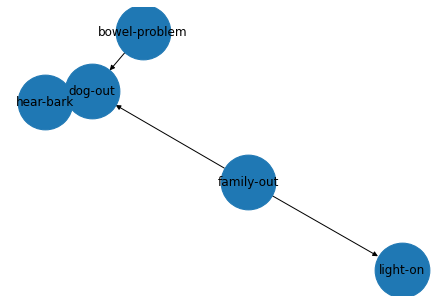

In [5]:
dogproblem.draw_structure()

In [6]:
dogproblem.get_all_variables()

['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']

In [7]:
dogproblem.get_all_cpts()

{'light-on':    family-out  light-on     p
 0       False     False  0.60
 1       False      True  0.40
 2        True     False  0.05
 3        True      True  0.95, 'bowel-problem':    bowel-problem     p
 0          False  0.01
 1           True  0.99, 'dog-out':    family-out  bowel-problem  dog-out     p
 0       False          False    False  0.99
 1       False          False     True  0.01
 2       False           True    False  0.97
 3       False           True     True  0.03
 4        True          False    False  0.90
 5        True          False     True  0.10
 6        True           True    False  0.30
 7        True           True     True  0.70, 'hear-bark':    dog-out  hear-bark     p
 0    False      False  0.70
 1    False       True  0.30
 2     True      False  0.01
 3     True       True  0.99, 'family-out':    family-out     p
 0       False  0.15
 1        True  0.85}

In [8]:
dogproblem.get_children('light-on')

[]

In [9]:
dogproblem.get_all_edges()

[('bowel-problem', 'dog-out'),
 ('dog-out', 'hear-bark'),
 ('family-out', 'light-on'),
 ('family-out', 'dog-out')]

## a) d-separation 

In [10]:
reasoner = BNReasoner(dogproblem)

In [11]:
x = ['bowel-problem', 'family-out']
y = ['hear-bark', 'light-on']
z = ['dog-out']
reasoner.d_separation(x, y, z)

False

## b) Ordering

Mindegree heuristic: 


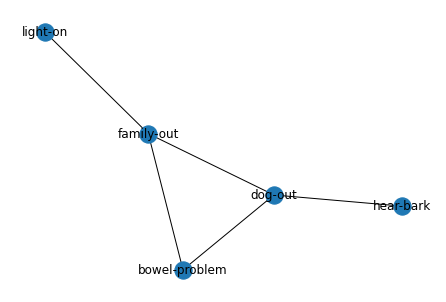

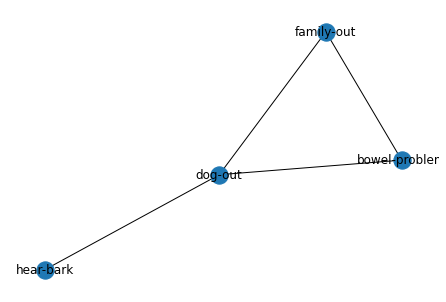

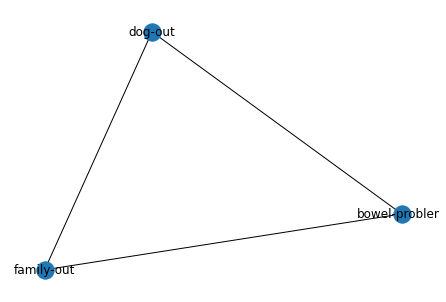

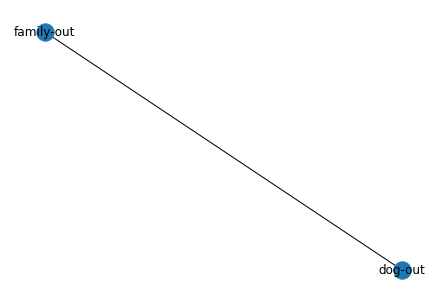

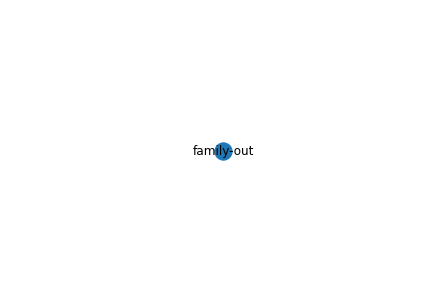

['light-on', 'hear-bark', 'bowel-problem', 'dog-out', 'family-out']

In [12]:
print('Mindegree heuristic: ')
reasoner.ordering_mindegree()

In [13]:
print('Minfill heuristic: ')

reasoner.ordering_minfill()

Minfill heuristic: 


['light-on', 'hear-bark', 'bowel-problem', 'dog-out', 'family-out']

# c) Network Pruning

In [14]:
q = ['dog-out']
e = pd.Series({'light-on': True, 'bowel-problem': False})

pruned = reasoner.net_prune(q, e)

C:\Users\Valen\Documents\Master AI VU\KR\KR-Project2\BNReasoner.py:200: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_cpt = new_cpt.drop(ev[0], 1)


In [15]:
pruned.get_cpt('dog-out')

,family-out,dog-out,p
0,False,False,0.99
1,False,True,0.01
4,True,False,0.90
5,True,True,0.10


## d) Marginal distributions

### summing-out: 

In [16]:
factor = dogproblem.get_cpt('dog-out')
factor

,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
2,False,True,False,0.97
3,False,True,True,0.03
4,True,False,False,0.90
5,True,False,True,0.10
6,True,True,False,0.30
7,True,True,True,0.70


In [17]:
reasoner.sum_out(factor, ['bowel-problem'])

C:\Users\Valen\Documents\Master AI VU\KR\KR-Project2\BNReasoner.py:229: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  summed_out = summed_out.drop(var, 1)


,family-out,dog-out,p
0,False,False,1.96
1,False,True,0.04
2,True,False,1.20
3,True,True,0.80


### multiplying

In [18]:
dog = dogproblem.get_cpt('dog-out')
dog

,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
2,False,True,False,0.97
3,False,True,True,0.03
4,True,False,False,0.90
5,True,False,True,0.10
6,True,True,False,0.30
7,True,True,True,0.70


In [19]:
bark = dogproblem.get_cpt('hear-bark')
bark

,dog-out,hear-bark,p
0,False,False,0.70
1,False,True,0.30
2,True,False,0.01
3,True,True,0.99


In [20]:
dog = dogproblem.get_cpt('dog-out')
bark = dogproblem.get_cpt('hear-bark')

reasoner.multiply(dog, bark)

,family-out,bowel-problem,dog-out,hear-bark,p
0,True,True,True,True,0.6930
1,True,True,True,False,0.0070
2,True,True,False,True,0.0900
3,True,True,False,False,0.2100
4,True,False,True,True,0.0990
5,True,False,True,False,0.0010
6,True,False,False,True,0.2700
7,True,False,False,False,0.6300
8,False,True,True,True,0.0297
9,False,True,True,False,0.0003


In [21]:
reasoner.multiply(bark, dog)

,dog-out,hear-bark,family-out,bowel-problem,p
0,True,True,True,True,0.6930
1,True,True,True,False,0.0990
2,True,True,False,True,0.0297
3,True,True,False,False,0.0099
4,True,False,True,True,0.0070
5,True,False,True,False,0.0010
6,True,False,False,True,0.0003
7,True,False,False,False,0.0001
8,False,True,True,True,0.0900
9,False,True,True,False,0.2700


### get marginal

In [22]:
evidence = pd.Series({"bowel-problem": False, "family-out": False})
query_vars = ["dog-out", "light-on"]

marginals = reasoner.get_marginal(query_vars, evidence)
#print(marginals['light-on'])

C:\Users\Valen\Documents\Master AI VU\KR\KR-Project2\BNReasoner.py:229: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  summed_out = summed_out.drop(var, 1)


In [23]:
marginals

,p,dog-out,light-on
0,0.515616,True,True
1,0.351884,False,True
2,0.078754,True,False
3,0.053746,False,False


In [98]:
def maxx_out(factor: pd.DataFrame, maxoutvariables: list):
    """
    takes a cpt(factor) and a set of variables
    returns a cpt with the goven variables maxxed out
    """

    # getting all variables in the factor
    allvariables = list(factor.columns)
    allvariables.remove("p")

    # get a list of variables which should remain
    stayvariables = [
        variable for variable in allvariables if variable not in maxoutvariables
    ]

    if len(stayvariables) == 0:
        return factor.max()
    print(factor)
    sorting = factor.groupby(stayvariables)
    maxx = sorting.max()
    maxx = maxx.drop(maxoutvariables, axis = 1)
    
    maxx = maxx.merge(factor, 'left')
    
    print(maxx)

    return maxx

In [121]:
def MPE(reasoner, heuristic: str = 'random', e_vars: pd.Series = pd.Series()):
    '''
    heuristic can be 'random', 'mindegree', 'minfill'
    
    '''

    #heurustics = {'random': ordering_random,
    #              'mindegree': ordering_mindegree,
    #              'minfill': ordering_minfill}
    
    q_vars = reasoner.bn.get_all_variables()
    
    N = reasoner.net_prune(q_vars, e_vars)  # prune edges  

    order = BNReasoner(N).ordering_minfill()  # elimination order of variables Q # put this as parameter 

    cpts = N.get_all_cpts()
    
    print(order)
    
    #loop over variables in order given
    for variable in order:
        #get factors which contain variable
        factors = []
        delete = []
        for key, value in cpts.items():
            if variable in value.columns:
                factors.append(value)
                delete.append(key)
        if len(factors) == 0:
            continue
        
        #multiply factors
        print(factors)
        factor = mult(factors)
        
        print(factor)
        
        #may out variable
        maxfactor = maxx_out(factor, [variable])
        
        #delete factors from cpts
        for var in delete:
            del cpts[var]
            
        #add new factor to cpts
        #TODO: can maxxout always return dataframe?
        print(maxfactor)
        if type(maxfactor) == pd.DataFrame:
            cpts[variable] = maxfactor
        else:
            cpts[variable] = maxfactor.to_frame().T

    for factor in cpts.items():
        print(factor)
        print(type(factor))
        
    maxx = reasoner.multiply_multi(*cpts.values())
    m = maxx['p'].max()
    print(m)
    result = maxx.loc[maxx['p'] == m]
        
    return result

C:\Users\Valen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [122]:
def mult(factors: list):
    
    variables = []
    for factor in factors:
        for var in factor.columns:
            if var not in variables:
                variables.append(var)
    variables.remove('p')
    
    intersect = set(factors[0].columns)
    for factor in factors[1:]:
        intersect.intersection_update(factor.columns)
    intersect = list(intersect)
    intersect.remove('p')

    grand = factors[0]
    for factor in factors[1:]:
        grand = grand.merge(factor, how = 'outer', on = intersect)
        grand['p'] = grand.apply(lambda row: row['p_x']*row['p_y'], axis = 1)
        grand = grand.drop(['p_x', 'p_y'], axis = 1)
    
    return grand

In [123]:
mult([bark, dog])

,dog-out,hear-bark,family-out,bowel-problem,p
0,False,False,False,False,0.6930
1,False,False,False,True,0.6790
2,False,False,True,False,0.6300
3,False,False,True,True,0.2100
4,False,True,False,False,0.2970
5,False,True,False,True,0.2910
6,False,True,True,False,0.2700
7,False,True,True,True,0.0900
8,True,False,False,False,0.0001
9,True,False,False,True,0.0003


In [124]:
MPE(reasoner, 'random')

['light-on', 'hear-bark', 'bowel-problem', 'dog-out', 'family-out']
[   family-out  light-on     p
0       False     False  0.60
1       False      True  0.40
2        True     False  0.05
3        True      True  0.95]
   family-out  light-on     p
0       False     False  0.60
1       False      True  0.40
2        True     False  0.05
3        True      True  0.95
   family-out  light-on     p
0       False     False  0.60
1       False      True  0.40
2        True     False  0.05
3        True      True  0.95
      p  family-out  light-on
0  0.60       False     False
1  0.95        True      True
      p  family-out  light-on
0  0.60       False     False
1  0.95        True      True
[   dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99]
   dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99
   dog-out  hear-b

,p,family-out,light-on,dog-out,hear-bark,bowel-problem
3,0.554002,True,True,True,True,True
